In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as smi
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statistics import mean
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, GRU, Dropout, Conv1D, MaxPooling1D, Flatten, RepeatVector
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from hyperopt import hp, Trials, fmin, tpe
import joblib
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv(r'E:\A aPython Programms\Data1\Bank.csv')
df.tail(5)

,Date,AXISBANK,AXISVOL,BAJAJFIN,BAJAJFINVOL,BOB,BOBVOL,FEDBANK,FEDVOL,HDFC,...,KOTAK,KOTAKVOL,PNB,PNBVOL,SBI,SBIVOL,REC,RECVOL,PIRAMAL,PIRAMALVOL
3748,21-03-2024,1035.599976,9903738,6715.750000,1806092,255.699997,10121220,149.949997,6212045,1445.750000,...,1772.150024,3783681,121.050003,38099730,744.299988,15161161,450.250000,18429233,841.599976,987716
3749,22-03-2024,1033.300049,9891194,6760.899902,1125238,259.799988,11402546,149.600006,8409218,1442.849976,...,1776.400024,7061283,122.750000,35001868,746.700012,15535921,460.100006,12531582,861.500000,1618543
3750,26-03-2024,1040.550049,9656767,6910.100098,1850321,261.549988,8259347,149.800003,7742995,1425.400024,...,1753.699951,5303630,123.949997,30860596,740.049988,14678342,461.399994,10475524,858.250000,1391794
3751,27-03-2024,1052.849976,17027308,7022.750000,1551275,258.750000,19196992,149.800003,20853016,1440.699951,...,1775.599976,8231130,122.750000,42673023,733.299988,30088789,445.600006,28138339,840.200012,1344329
3752,28-03-2024,1047.199951,10235318,7245.250000,3574518,264.049988,11966752,150.199997,7208707,1447.900024,...,1785.500000,6630072,124.400002,29453142,752.349976,21705116,451.000000,12637899,849.349976,5261416


In [3]:
feature_columns = ['BAJAJFIN', 'BAJAJFINVOL']
target_column = ['BAJAJFIN']
features = df[feature_columns]
target = df[target_column].shift(-1)

new_data1 = 7250.95
target.iloc[-1, 0] = new_data1

target.tail(5)

,BAJAJFIN
3748,6760.899902
3749,6910.100098
3750,7022.750000
3751,7245.250000
3752,7250.950000


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

n_steps = 5  # Number of timesteps to look back
X, y = [], []

for i in range(n_steps, len(scaled_features)):
    X.append(scaled_features[i-n_steps:i])
    y.append(scaled_target[i])

X = np.array(X)
y = np.array(y)

split=int(0.8*len(X))
X_train, y_train= X[:split], y[:split]
X_test, y_test= X[split:], y[split:]

In [5]:
model_lstm = load_model('model_lstm_bajajfin1_0.9427.keras')
model_lstm.predict(X_test)

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae_n=mean_absolute_error(y_test, predictions_lstm)
print(f"MAE_normalizeddata: {mae_n:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R2: 0.9427
MAPE: 0.0198
RMSE: 178.5588
RMSE_normalizeddata: 0.0219
MAE_normalizeddata: 0.0162
MAE: 132.3576


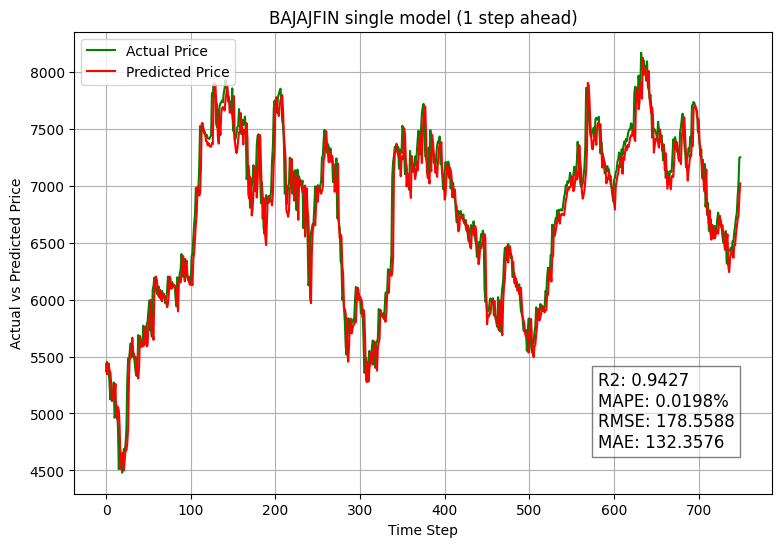

In [6]:
plt.figure(figsize=(9, 6))
plt.plot(y_test_actual_LSTM, color='green', label=['Actual Price'])
plt.plot(predictions_LSTM, color='red', label=['Predicted Price'])
plt.legend(['Actual Price', 'Predicted Price'], loc='upper left')

plt.text(0.75, 0.1, f'R2: {r2:.4f}\nMAPE: {mape:.4f}%\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5),
         transform=plt.gca().transAxes)

plt.grid(True)
plt.title('BAJAJFIN single model (1 step ahead)')
plt.xlabel('Time Step')
plt.ylabel('Actual vs Predicted Price')
plt.savefig('bajajfin_1sa-1l.png', dpi=600)  # Saves the plot as a PNG file
plt.show()

In [7]:
model_lstm.predict(X_train)

predictions_train_lstm = model_lstm.predict(X_train)
predictions_train_LSTM = scaler.inverse_transform(predictions_train_lstm)
y_train_actual_LSTM = scaler.inverse_transform(y_train.reshape(-1, 1))

r2=r2_score(y_train_actual_LSTM, predictions_train_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_train_actual_LSTM, predictions_train_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_train_actual_LSTM, predictions_train_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_train, predictions_train_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae_n=mean_absolute_error(y_train, predictions_train_lstm)
print(f"MAE_normalizeddata: {mae_n:.4f}")

mae=mean_absolute_error(y_train_actual_LSTM, predictions_train_LSTM)
print(f"MAE: {mae:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
R2: 0.9978
MAPE: 0.1938
RMSE: 65.0180
RMSE_normalizeddata: 0.0080
MAE_normalizeddata: 0.0042
MAE: 34.3020


In [8]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0122 - val_loss: 0.0011
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.7381e-04 - val_loss: 9.7865e-04
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.5910e-04 - val_loss: 9.7362e-04
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 1.2059e-04 - val_loss: 0.0011
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 1.1493e-04 - val_loss: 8.8585e-04
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1.3648e-04 - val_loss: 0.0011
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.1274e-04 - val_loss: 0.0011
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.1457e-04 - val_loss: 9.3519e-04
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1.1371e-04 - val_loss: 0.0013
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.1129e-04 - val_loss: 9.1784e-04
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 1.1149e-04 - val_loss:

In [28]:
model_lstm.save('model_lstm_bajajfin1_1.keras')

In [29]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 24s 98ms/step - loss: 0.0095 - val_loss: 9.1257e-04
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 1.2300e-04 - val_loss: 0.0012
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 1.2287e-04 - val_loss: 0.0012
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 1.3284e-04 - val_loss: 9.3223e-04
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 1.2094e-04 - val_loss: 0.0012
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 1.2421e-04 - val_loss: 9.4176e-04
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 1.2629e-04 - val_loss: 8.5062e-04
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 1.2820e-04 - val_loss: 9.9306e-04
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 1.1155e-04 - val_loss: 8.4604e-04
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 1.1853e-04 - val_loss: 0.0012
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 1.2578e-04 - val_

In [30]:
model_lstm.save('model_lstm_bajajfin1_2.keras')

In [31]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - loss: 0.0102 - val_loss: 9.0148e-04
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 1.1549e-04 - val_loss: 8.7407e-04
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 1.2776e-04 - val_loss: 0.0011
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 1.4191e-04 - val_loss: 8.5509e-04
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 1.3285e-04 - val_loss: 9.5451e-04
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 1.3805e-04 - val_loss: 8.4869e-04
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 1.2485e-04 - val_loss: 0.0012
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 1.2885e-04 - val_loss: 9.2087e-04
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 1.1286e-04 - val_loss: 9.5573e-04
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 1.4390e-04 - val_loss: 8.4263e-04
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 1.2247e-0

In [32]:
model_lstm.save('model_lstm_bajajfin1_3.keras')

In [33]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 95ms/step - loss: 0.0126 - val_loss: 0.0010
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 1.1654e-04 - val_loss: 8.9339e-04
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 1.2631e-04 - val_loss: 8.9742e-04
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 1.1444e-04 - val_loss: 0.0014
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 1.2013e-04 - val_loss: 0.0020
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 1.4272e-04 - val_loss: 8.9174e-04
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 1.2254e-04 - val_loss: 8.5667e-04
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 1.3061e-04 - val_loss: 8.5995e-04
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 1.3547e-04 - val_loss: 8.4494e-04
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 9.8728e-05 - val_loss: 0.0017
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 1.1921e-04 - val

In [34]:
model_lstm.save('model_lstm_bajajfin1_4.keras')

In [35]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 68ms/step - loss: 0.0113 - val_loss: 8.8828e-04
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 1.4565e-04 - val_loss: 0.0012
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 1.2814e-04 - val_loss: 0.0011
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 1.2074e-04 - val_loss: 8.4498e-04
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 1.2139e-04 - val_loss: 9.0832e-04
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 1.1848e-04 - val_loss: 9.2597e-04
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 1.2254e-04 - val_loss: 0.0015
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 1.3330e-04 - val_loss: 8.1778e-04
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 1.2187e-04 - val_loss: 8.2720e-04
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 1.3094e-04 - val_loss: 9.4552e-04
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 1.3092e-04 - 

In [36]:
model_lstm.save('model_lstm_bajajfin1_5.keras')

In [37]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 30s 100ms/step - loss: 0.0132 - val_loss: 9.2950e-04
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 1.3809e-04 - val_loss: 9.6356e-04
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 1.3042e-04 - val_loss: 0.0013
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 1.5079e-04 - val_loss: 9.4298e-04
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 1.4104e-04 - val_loss: 0.0020
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 1.3258e-04 - val_loss: 0.0011
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 1.3303e-04 - val_loss: 0.0011
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 1.4409e-04 - val_loss: 8.8570e-04
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 1.2308e-04 - val_loss: 8.3368e-04
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 1.3334e-04 - val_loss: 8.3327e-04
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step
R2: 0.9020
MAPE: 0.0262
RMSE: 233.64

In [38]:
model_lstm.save('model_lstm_bajajfin1_6.keras')

In [39]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 32s 72ms/step - loss: 0.0108 - val_loss: 9.4165e-04
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 1.2715e-04 - val_loss: 9.9024e-04
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 1.0501e-04 - val_loss: 9.0652e-04
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 1.3427e-04 - val_loss: 8.5035e-04
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 1.5756e-04 - val_loss: 9.7344e-04
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 1.1663e-04 - val_loss: 0.0011
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 1.0007e-04 - val_loss: 0.0014
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 1.3199e-04 - val_loss: 8.7080e-04
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 9.5723e-05 - val_loss: 8.4090e-04
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 1.3346e-04 - val_loss: 0.0014
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 1.1946e-04 - 

In [40]:
model_lstm.save('model_lstm_bajajfin1_7.keras')

In [41]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 104ms/step - loss: 0.0099 - val_loss: 9.0268e-04
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 1.2820e-04 - val_loss: 9.9627e-04
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 1.5442e-04 - val_loss: 9.7666e-04
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 1.2185e-04 - val_loss: 0.0015
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 1.3967e-04 - val_loss: 9.8214e-04
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 1.2008e-04 - val_loss: 9.3549e-04
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 1.2478e-04 - val_loss: 9.3911e-04
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 1.2422e-04 - val_loss: 8.6364e-04
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 1.2911e-04 - val_loss: 9.5861e-04
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 1.2625e-04 - val_loss: 0.0013
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 1.2049e-

In [42]:
model_lstm.save('model_lstm_bajajfin1_8.keras')

In [43]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 33s 138ms/step - loss: 0.0097 - val_loss: 9.6444e-04
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 1.4080e-04 - val_loss: 0.0011
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 1.4058e-04 - val_loss: 0.0011
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - loss: 1.4490e-04 - val_loss: 9.8153e-04
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 1.2374e-04 - val_loss: 8.7501e-04
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 1.1742e-04 - val_loss: 0.0011
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 1.4833e-04 - val_loss: 8.4025e-04
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 1.1323e-04 - val_loss: 8.5308e-04
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 1.0789e-04 - val_loss: 9.5668e-04
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 1.1533e-04 - val_loss: 8.2875e-04
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 1.1712e-04 

In [44]:
model_lstm.save('model_lstm_bajajfin1_9.keras')

In [45]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(412, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=39, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='loss', patience=5)])

predictions_lstm = model_lstm.predict(X_test)
predictions_LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

r2=r2_score(y_test_actual_LSTM, predictions_LSTM)
print(f"R2: {r2:.4f}")

mape=mean_absolute_percentage_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAPE: {mape:.4f}")

mse=mean_squared_error(y_test_actual_LSTM, predictions_LSTM)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

mse_normalizeddata=mean_squared_error(y_test, predictions_lstm)
rmse_normalizeddata=np.sqrt(mse_normalizeddata)
print(f"RMSE_normalizeddata: {rmse_normalizeddata:.4f}")

mae=mean_absolute_error(y_test_actual_LSTM, predictions_LSTM)
print(f"MAE: {mae:.4f}")

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - loss: 0.0128 - val_loss: 0.0011
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 1.2752e-04 - val_loss: 8.9507e-04
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 1.4539e-04 - val_loss: 9.6603e-04
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 1.5206e-04 - val_loss: 9.1656e-04
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 1.3229e-04 - val_loss: 0.0011
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 1.2621e-04 - val_loss: 9.9720e-04
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 1.3326e-04 - val_loss: 0.0012
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 1.4018e-04 - val_loss: 0.0015
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 1.3594e-04 - val_loss: 0.0011
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 1.4194e-04 - val_loss: 0.0010
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 1.1645e-04 - val_loss: 9.

In [46]:
model_lstm.save('model_lstm_bajajfin1_10.keras')